In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os
import torch
import seaborn as sns

### FUNCIONES DE PÉRDIDA ENTRENAMIENTO

In [2]:
train_path = 'Results/train_metrics'
file_list = os.listdir(train_path)
datasets = file_list
datasets

['fulsang_data', 'hugo_data', 'jaulab_data']

In [3]:
# SELECT THE DATASET
dataset = datasets[0]

In [4]:
n_subjects = 18 # 18
subjects = ['S'+str(n+1) for n in range(n_subjects)] # create a list with the subjects
trained_subjects = set() # create an empty set to append the trained subjects

In [6]:
train_metrics = {}
models = ['FCNN', 'CNN']
splits = ['train', 'val']

key = '31_07'

for model in models:
    for split in splits:
        path = os.path.join(train_path, dataset, split, model+'_'+key)
        file_list = os.listdir(path)
        train_metrics[model+'_'+split] = {}
        for file in file_list:
            for subj in subjects:
                if subj in file:
                    if subj == 'S1':
                        idx = file.index(subj)
                        if not file[idx+2].isdigit(): # if the next character following to S1 is not a number
                            loss = json.load(open(os.path.join(path,file), 'r'))
                            train_metrics[model+'_'+split][subj] = loss
                            trained_subjects.add(subj)
                    else:   
                        loss = json.load(open(os.path.join(path,file), 'r'))
                        train_metrics[model+'_'+split][subj] = loss
                        trained_subjects.add(subj)

epocas = len(train_metrics['FCNN_train']['S10'])
print(f'Epocas {epocas}')               
                

Epocas 54


In [9]:
# Ordeno los sujetos
trained_subjects = sorted(trained_subjects, key= lambda x: int(x[1:]))
trained_subjects

['S1',
 'S2',
 'S3',
 'S4',
 'S5',
 'S6',
 'S7',
 'S8',
 'S9',
 'S10',
 'S11',
 'S12',
 'S13',
 'S14',
 'S15',
 'S16',
 'S17',
 'S18']

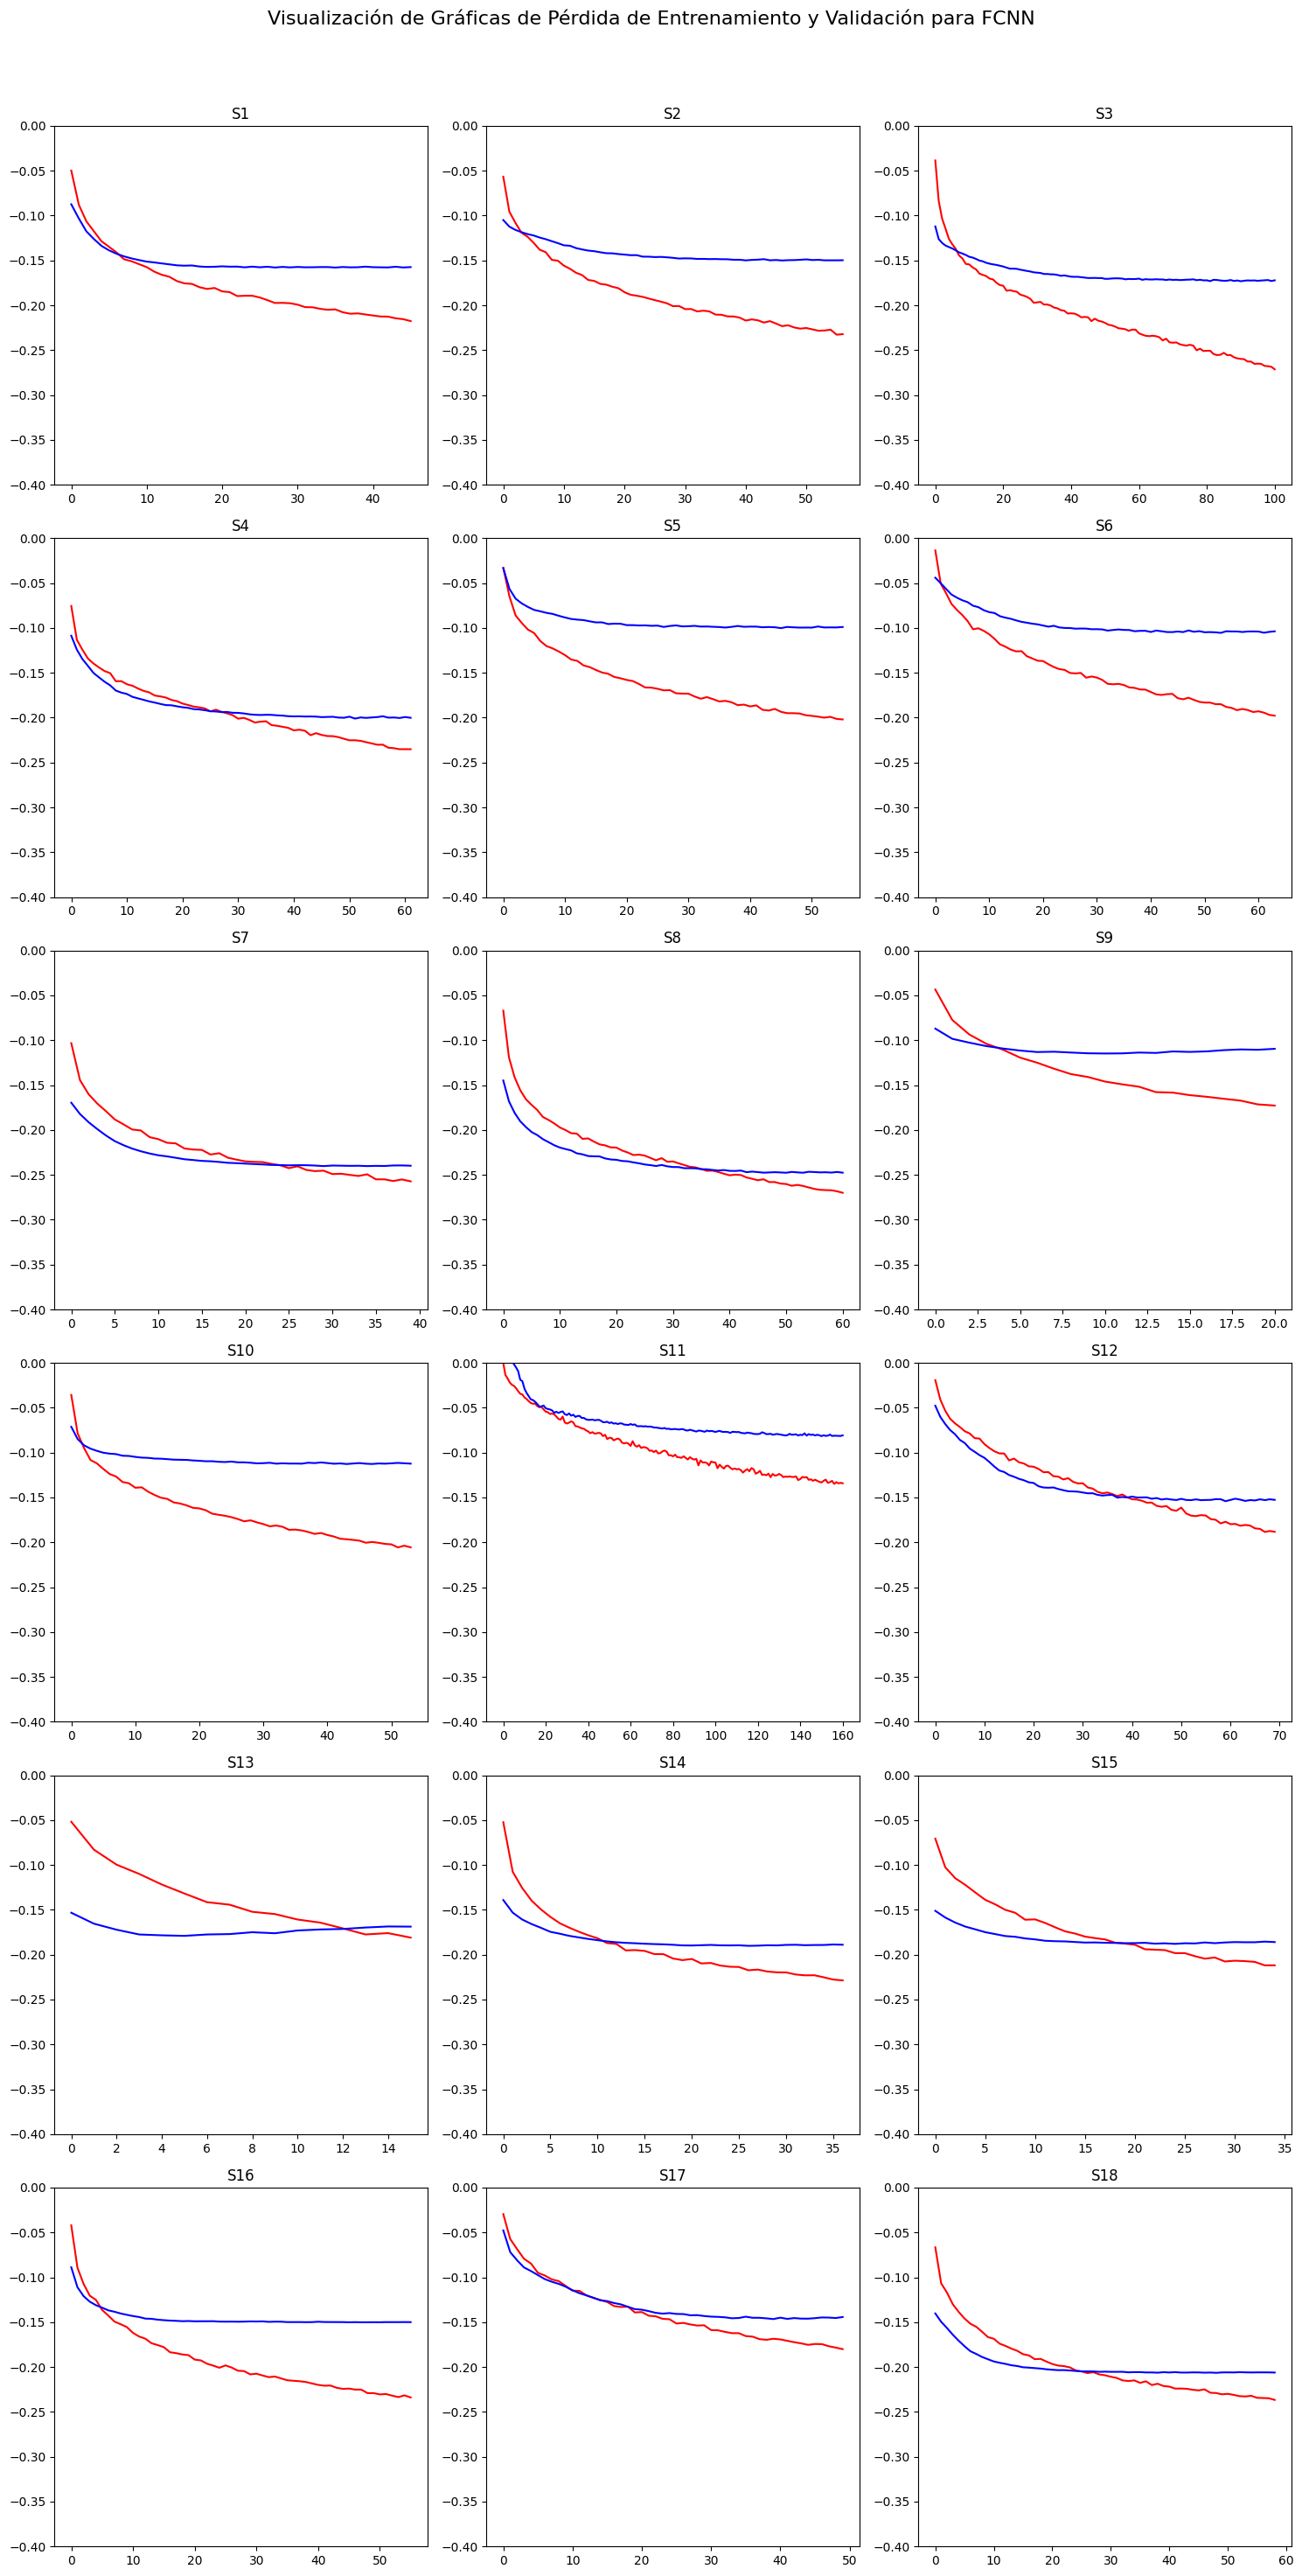

In [10]:
# Seleccionar FCNN o CNN
mode = 'FCNN'
n_subj = len(train_metrics[mode+'_val'])

n_plots = n_subj

# Calcular el número de filas necesarias
n_rows = (n_plots + 2) // 3

# Creo la figura y una matriz de subfiguras
fig, axs = plt.subplots(nrows=n_rows, ncols=3, figsize=(15, 5 * n_rows))

# Aplanar la matriz de subfiguras para un acceso fácil
axs = axs.flatten()

idx = 0
for subj in trained_subjects:
    train_loss = torch.tensor(train_metrics[mode+'_train'][subj])
    val_loss = torch.tensor(train_metrics[mode+'_val'][subj])
    x = range(len(val_loss))
    
    axs[idx].plot(x, -train_loss, linestyle = '-', color='r')
    axs[idx].plot(x, -val_loss, linestyle = '-', color= 'b')
    axs[idx].set_ylim(-0.4, 0)
    axs[idx].set_title(subj)
    idx += 1

# Eliminar subfiguras vacías si hay menos subfiguras que lugares en la cuadrícula
for ax in axs[idx:]:
    fig.delaxes(ax)

plt.tight_layout()
# Agregar un título general a la figura
fig.suptitle('Visualización de Gráficas de Pérdida de Entrenamiento y Validación para '+ mode, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar el layout para dejar espacio para el título

plt.show()

### MOSTRAR DATA POR SUJETO COMPARACIÓN FCNN CON CNN

In [21]:
train_metrics.keys()

dict_keys(['FCNN_train', 'FCNN_val', 'CNN_train', 'CNN_val'])

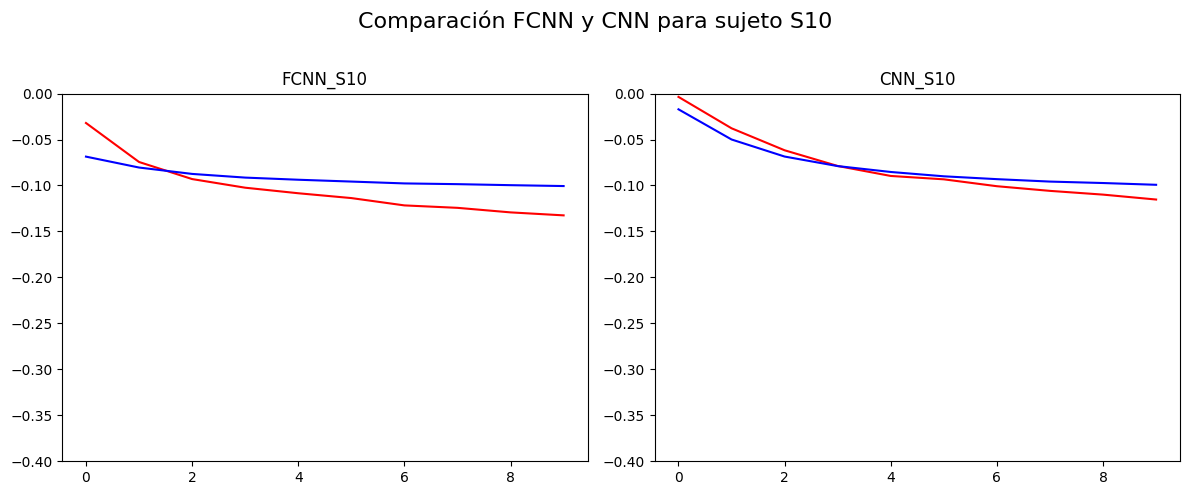

In [22]:
# Seleccionar FCNN o CNN
models = ['FCNN', 'CNN']

# Calcular el número de filas necesarias
n_rows = (n_plots + 2) // 3

# Creo la figura y una matriz de subfiguras
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Aplanar la matriz de subfiguras para un acceso fácil
axs = axs.flatten()

idx = 0

# Select the subject
subj = 'S10'

for n in range(2):
    train_loss = torch.tensor(train_metrics[models[n]+'_train'][subj])
    val_loss = torch.tensor(train_metrics[models[n]+'_val'][subj])
    x = range(len(val_loss))
    
    axs[idx].plot(x, -train_loss, linestyle = '-', color='r')
    axs[idx].plot(x, -val_loss, linestyle = '-', color= 'b')
    axs[idx].set_ylim(-0.4, 0)
    axs[idx].set_title(models[n]+'_'+subj)
    idx += 1

# Eliminar subfiguras vacías si hay menos subfiguras que lugares en la cuadrícula
for ax in axs[idx:]:
    fig.delaxes(ax)

plt.tight_layout()
# Agregar un título general a la figura
fig.suptitle('Comparación FCNN y CNN para sujeto '+ subj, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar el layout para dejar espacio para el título

plt.show()

### MOSTRAR RESULTADOS EVALUACIÓN

In [3]:
eval_path = 'Results/eval_metrics'

file_list = os.listdir(eval_path)
datasets = file_list
datasets

['fulsang_data', 'hugo_data', 'jaulab_data']

In [5]:
# LOAD RESULTS

# Save the mean results of each dataset
dataset_mean_results = {} 
# Save the complete results of each dataset
dataset_results = {} 

for dataset in datasets:

    path = os.path.join(eval_path, dataset)
    file_list = os.listdir(path)

    results = {}

    # Load data from the folder of results
    for file in file_list:
        str_chunks = file.split('_')
        if str_chunks[1].isdigit():
            model = str_chunks[0]
            date = str_chunks[1] + '_' + str_chunks[2]
        else:
            model = str_chunks[0] + '_' + str_chunks[1]
            date = str_chunks[2] + '_' + str_chunks[3]
        
        # Selecting data from the flitered and hugo eval metrics
        if date == '31_07' or (date == '19_07' and dataset == 'hugo_data'): 
            eval_results = json.load(open(os.path.join(eval_path,dataset,file),'r'))
            key = model + '_' + date
            results[key] = eval_results

    # Extract the subjects simulated
    subjects = set(list(results.values())[0].keys())

    # mean score of each subject by computing it with all the samples
    mean_results = {key: [np.mean(values[subj]) for subj in subjects] for key, values in results.items()}

    print(dataset)
    for key, values in mean_results.items():
        print(key +': ' + str(np.mean([round(value, 4) for value in values])))

    dataset_results[dataset] = results
    dataset_mean_results[dataset] = mean_results

fulsang_data
CNN_31_07: 0.13493888888888889
FCNN_31_07: 0.14132222222222224
Ridge_31_07: 0.07542777777777777
Ridge_Original_31_07: 0.07382222222222222
hugo_data
CNN_19_07: 0.19697692307692305
FCNN_19_07: 0.20863846153846152
Ridge_19_07: 0.16693076923076924
Ridge_Original_19_07: 0.1670076923076923
jaulab_data
CNN_31_07: 0.05238235294117648
FCNN_31_07: 0.051852941176470595
Ridge_31_07: 0.022052941176470588
Ridge_Original_31_07: 0.021647058823529415


[[0.10019155091554341, 0.11129961825079387, 0.14011100447012317, 0.17081850811911864, 0.12167174938083108, 0.21967841849662365, 0.08656505045015365, 0.16256832549684785, 0.15472823434923258, 0.1593772875558999, 0.11070163410312185, 0.11704774142346448, 0.18122915856540203, 0.1644496824243106, 0.1387010844429541, 0.0936982781947073, 0.07835855602907638, 0.11766241907742774], [0.11523541631060652, 0.1139312301247911, 0.1424721833349516, 0.17639401461489293, 0.14188425526229873, 0.23184999098276926, 0.11660305650697814, 0.14562015684864793, 0.16095917411575406, 0.15628877308944034, 0.1167245367276741, 0.128625461427372, 0.19374664772508873, 0.15884815531614652, 0.1350981700565252, 0.10615637977711029, 0.09062118637504885, 0.11286101337586943], [0.04708227358911393, 0.06596046882681389, 0.05514418769579291, 0.10229147524842626, 0.07229708034154742, 0.12223990794450802, 0.07273477455874747, 0.05385335535112788, 0.08400994828900629, 0.11419841825522631, 0.052732900208482376, 0.08098947565478

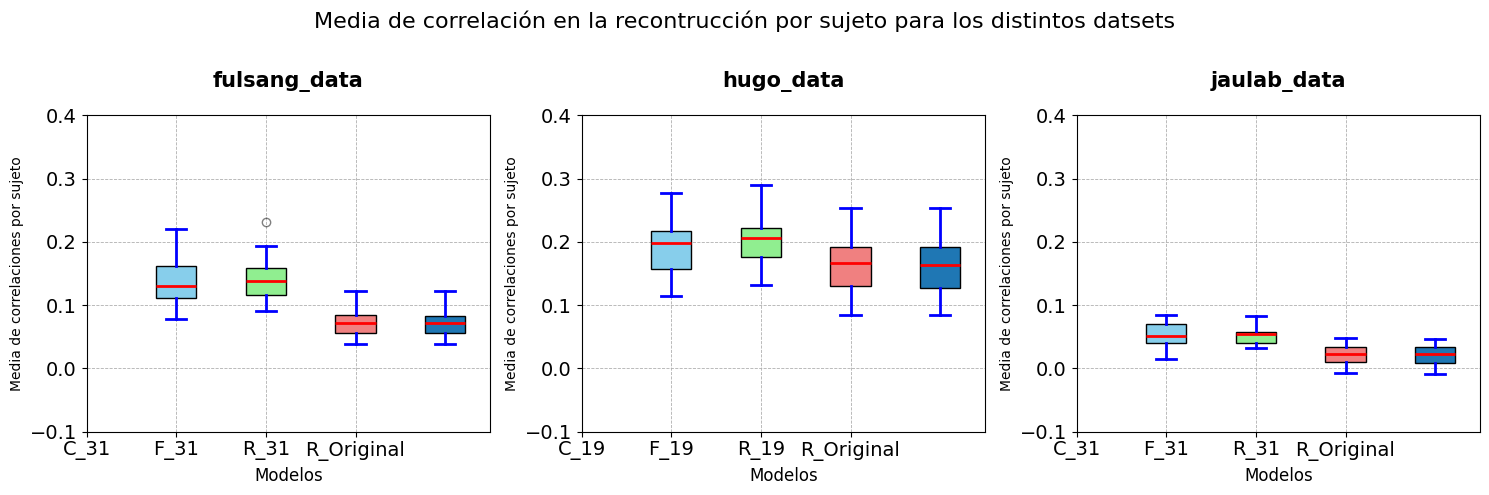

In [6]:
# PLOT DATASETS RESULTS

n_plots = len(datasets)

# Calcular el número de filas necesarias
n_rows = (n_plots + 2) // 3

# Creo la figura y una matriz de subfiguras
fig, axs = plt.subplots(nrows=n_rows, ncols=3, figsize=(15, 5 * n_rows))

axs = axs.flatten()

for n, dataset in enumerate(datasets):

    mean_results = dataset_mean_results[dataset]

    box = axs[n].boxplot([values for values in list(mean_results.values())], vert=True, patch_artist=True)

    print(list(mean_results.values()))

    # Colores personalizados
    colors = ['skyblue', 'lightgreen', 'lightcoral']

    # Aplicar colores a cada caja
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    # Personalizar otros elementos del gráfico
    for whisker in box['whiskers']:
        whisker.set(color='blue', linewidth=2)

    for cap in box['caps']:
        cap.set(color='blue', linewidth=2)

    for median in box['medians']:
        median.set(color='red', linewidth=2)

    for flier in box['fliers']:
        flier.set(marker='o', color='red', alpha=0.5)

    # Añadir título y etiquetas
    axs[n].set_title(dataset, fontsize=15, fontweight='bold', pad=20)
    axs[n].set_xlabel('Modelos', fontsize=12)
    axs[n].set_ylabel('Media de correlaciones por sujeto')
    axs[n].set_ylim([-0.1,0.4])
    axs[n].set_xticks([n for n in range(len(mean_results))], [key.split('_')[0][0] + '_' + key.split('_')[1] for key in mean_results.keys()], fontsize=14)  # Etiquetas personalizadas

    # Añadir rejilla para mayor legibilidad
    axs[n].grid(True, linestyle='--', linewidth=0.6)

    # Personalizar ejes
    axs[n].tick_params(axis='both', which='major', labelsize=14)

# Eliminar subfiguras vacías si hay menos subfiguras que lugares en la cuadrícula
for ax in axs[n+1:]:
    fig.delaxes(ax)

plt.tight_layout()
# Agregar un título general a la figura
fig.suptitle('Media de correlación en la recontrucción por sujeto para los distintos datsets', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar el layout para dejar espacio para el título


# Mostrar el gráfico
plt.show()

CNN_31_07: 0.05238235294117647
FCNN_31_07: 0.05185294117647059
Ridge_31_07: 0.022052941176470588
Ridge_Original_31_07: 0.02164705882352941


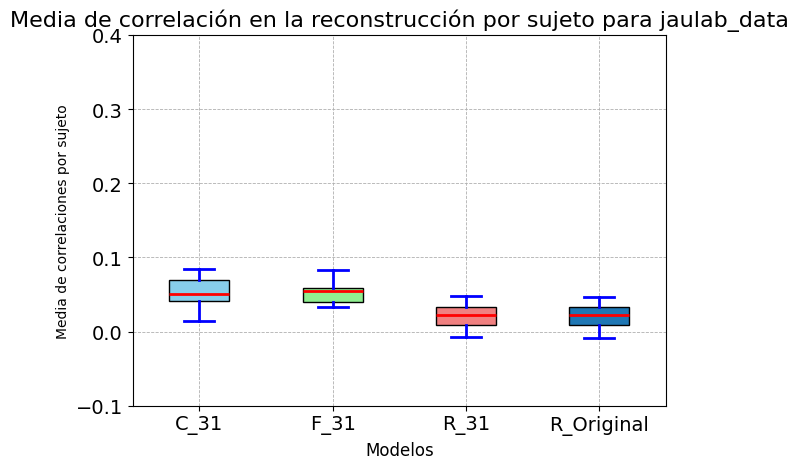

In [37]:
# MUESTRA SOLO UN DATASET
dataset = 'jaulab_data'

mean_results = dataset_mean_results[dataset]

# mean score of each subject by computing it with all the samples
# for key, values in results.items():
#     mean_results[key] = [np.mean(values[subj]) for subj in subjects]

for key, values in mean_results.items():
    print(key +': ' + str(np.mean([round(value, 4) for value in values])))

box = plt.boxplot([values for values in list(mean_results.values())], vert=True, patch_artist=True)

# Colores personalizados
colors = ['skyblue', 'lightgreen', 'lightcoral']

# Aplicar colores a cada caja
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Personalizar otros elementos del gráfico
for whisker in box['whiskers']:
    whisker.set(color='blue', linewidth=2)

for cap in box['caps']:
    cap.set(color='blue', linewidth=2)

for median in box['medians']:
    median.set(color='red', linewidth=2)

for flier in box['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)

# Añadir título y etiquetas
plt.xlabel('Modelos', fontsize=12)
plt.ylabel('Media de correlaciones por sujeto')
plt.ylim([-0.1,0.4])
plt.xticks([n+1 for n in range(len(results))], [key.split('_')[0][0] + '_' + key.split('_')[1] for key in results.keys()], fontsize=14)  # Etiquetas personalizadas

# Añadir rejilla para mayor legibilidad
plt.grid(True, linestyle='--', linewidth=0.6)

# Personalizar ejes
plt.tick_params(axis='both', which='major', labelsize=14)

# Agregar un título general a la figura
plt.title('Media de correlación en la reconstrucción por sujeto para ' + dataset, fontsize=16)
plt.tight_layout()  # Ajustar el layout para dejar espacio para el título


# Mostrar el gráfico
plt.show()

In [38]:
# MOSTRAR MEDIAS POR SUJETO Y POR MODELO
model = 'FCNN'
model_results = {subj: mean_results}
print(mean_results)

{'CNN_31_07': [0.040858067008191015, 0.04649860711855268, 0.05747724390398274, 0.08409867726544279, 0.055382119540202744, 0.05007138918717242, 0.014320383527471373, 0.0696249053295907, 0.0270171523512271, 0.071113339388713, 0.041472886002720186, 0.07523203537466445, 0.050748778652319665, 0.06270599731222867, 0.03589725887881071, 0.0722545230177842, 0.03569683631549098], 'FCNN_31_07': [0.040197629907784325, 0.04739172285753152, 0.0592998698108419, 0.08259896423620101, 0.05801853311195079, 0.033269969852245666, 0.032886113518797694, 0.058174392460064304, 0.036762845463379816, 0.04757533746908271, 0.04415204860615827, 0.03931120466453434, 0.05454090530971586, 0.07214341018040996, 0.05434291524673632, 0.06327708763610547, 0.05754826738285051], 'Ridge_31_07': [0.009472704239688764, 0.005530199750556605, 0.03372738143699274, 0.04518044675316474, 0.024245833239478366, 0.019850775685066217, 0.016784962401918915, 0.035618743596864025, 0.010804596284494653, 0.022183404858508785, -0.0078754124133

In [39]:
print(results.keys())
print(results.values())

dict_keys(['CNN_31_07', 'FCNN_31_07', 'Ridge_31_07', 'Ridge_Original_31_07'])
dict_values([{'S1': [0.19872532784938812, -0.14699946343898773, -0.25917384028434753, 0.016748713329434395, 0.469771146774292, 0.41401445865631104, 0.06033166125416756, 0.1929374486207962, 0.4756128787994385, 0.13763518631458282, 0.026902439072728157, 0.18651433289051056, 0.021230801939964294, 0.11408811062574387, 0.07501926273107529, 0.40781697630882263, 0.0003978698223363608, 0.11458076536655426, 0.043928079307079315, 0.17404508590698242, -0.1103057712316513, -0.17389708757400513, 0.18277215957641602, 0.14503471553325653, -0.19440683722496033, 0.047379784286022186, 0.3160162568092346, -0.05174240842461586, -0.02881079725921154, 0.0032418842893093824, -0.17373886704444885, 0.25262537598609924, 0.37958988547325134, -0.0451609343290329, 0.03451230376958847, 0.152121901512146, 0.1210821345448494, 0.18317356705665588, -0.054743532091379166, 0.12175805121660233, -0.05209437012672424, -0.17851507663726807, -0.0745

In [40]:
subjects = [subj for subj in results[list(results.keys())[0]].keys()]
print(subjects)
results_subj = {subject: {model: data[subject] for model, data in results.items()} for subject in subjects}

['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17']


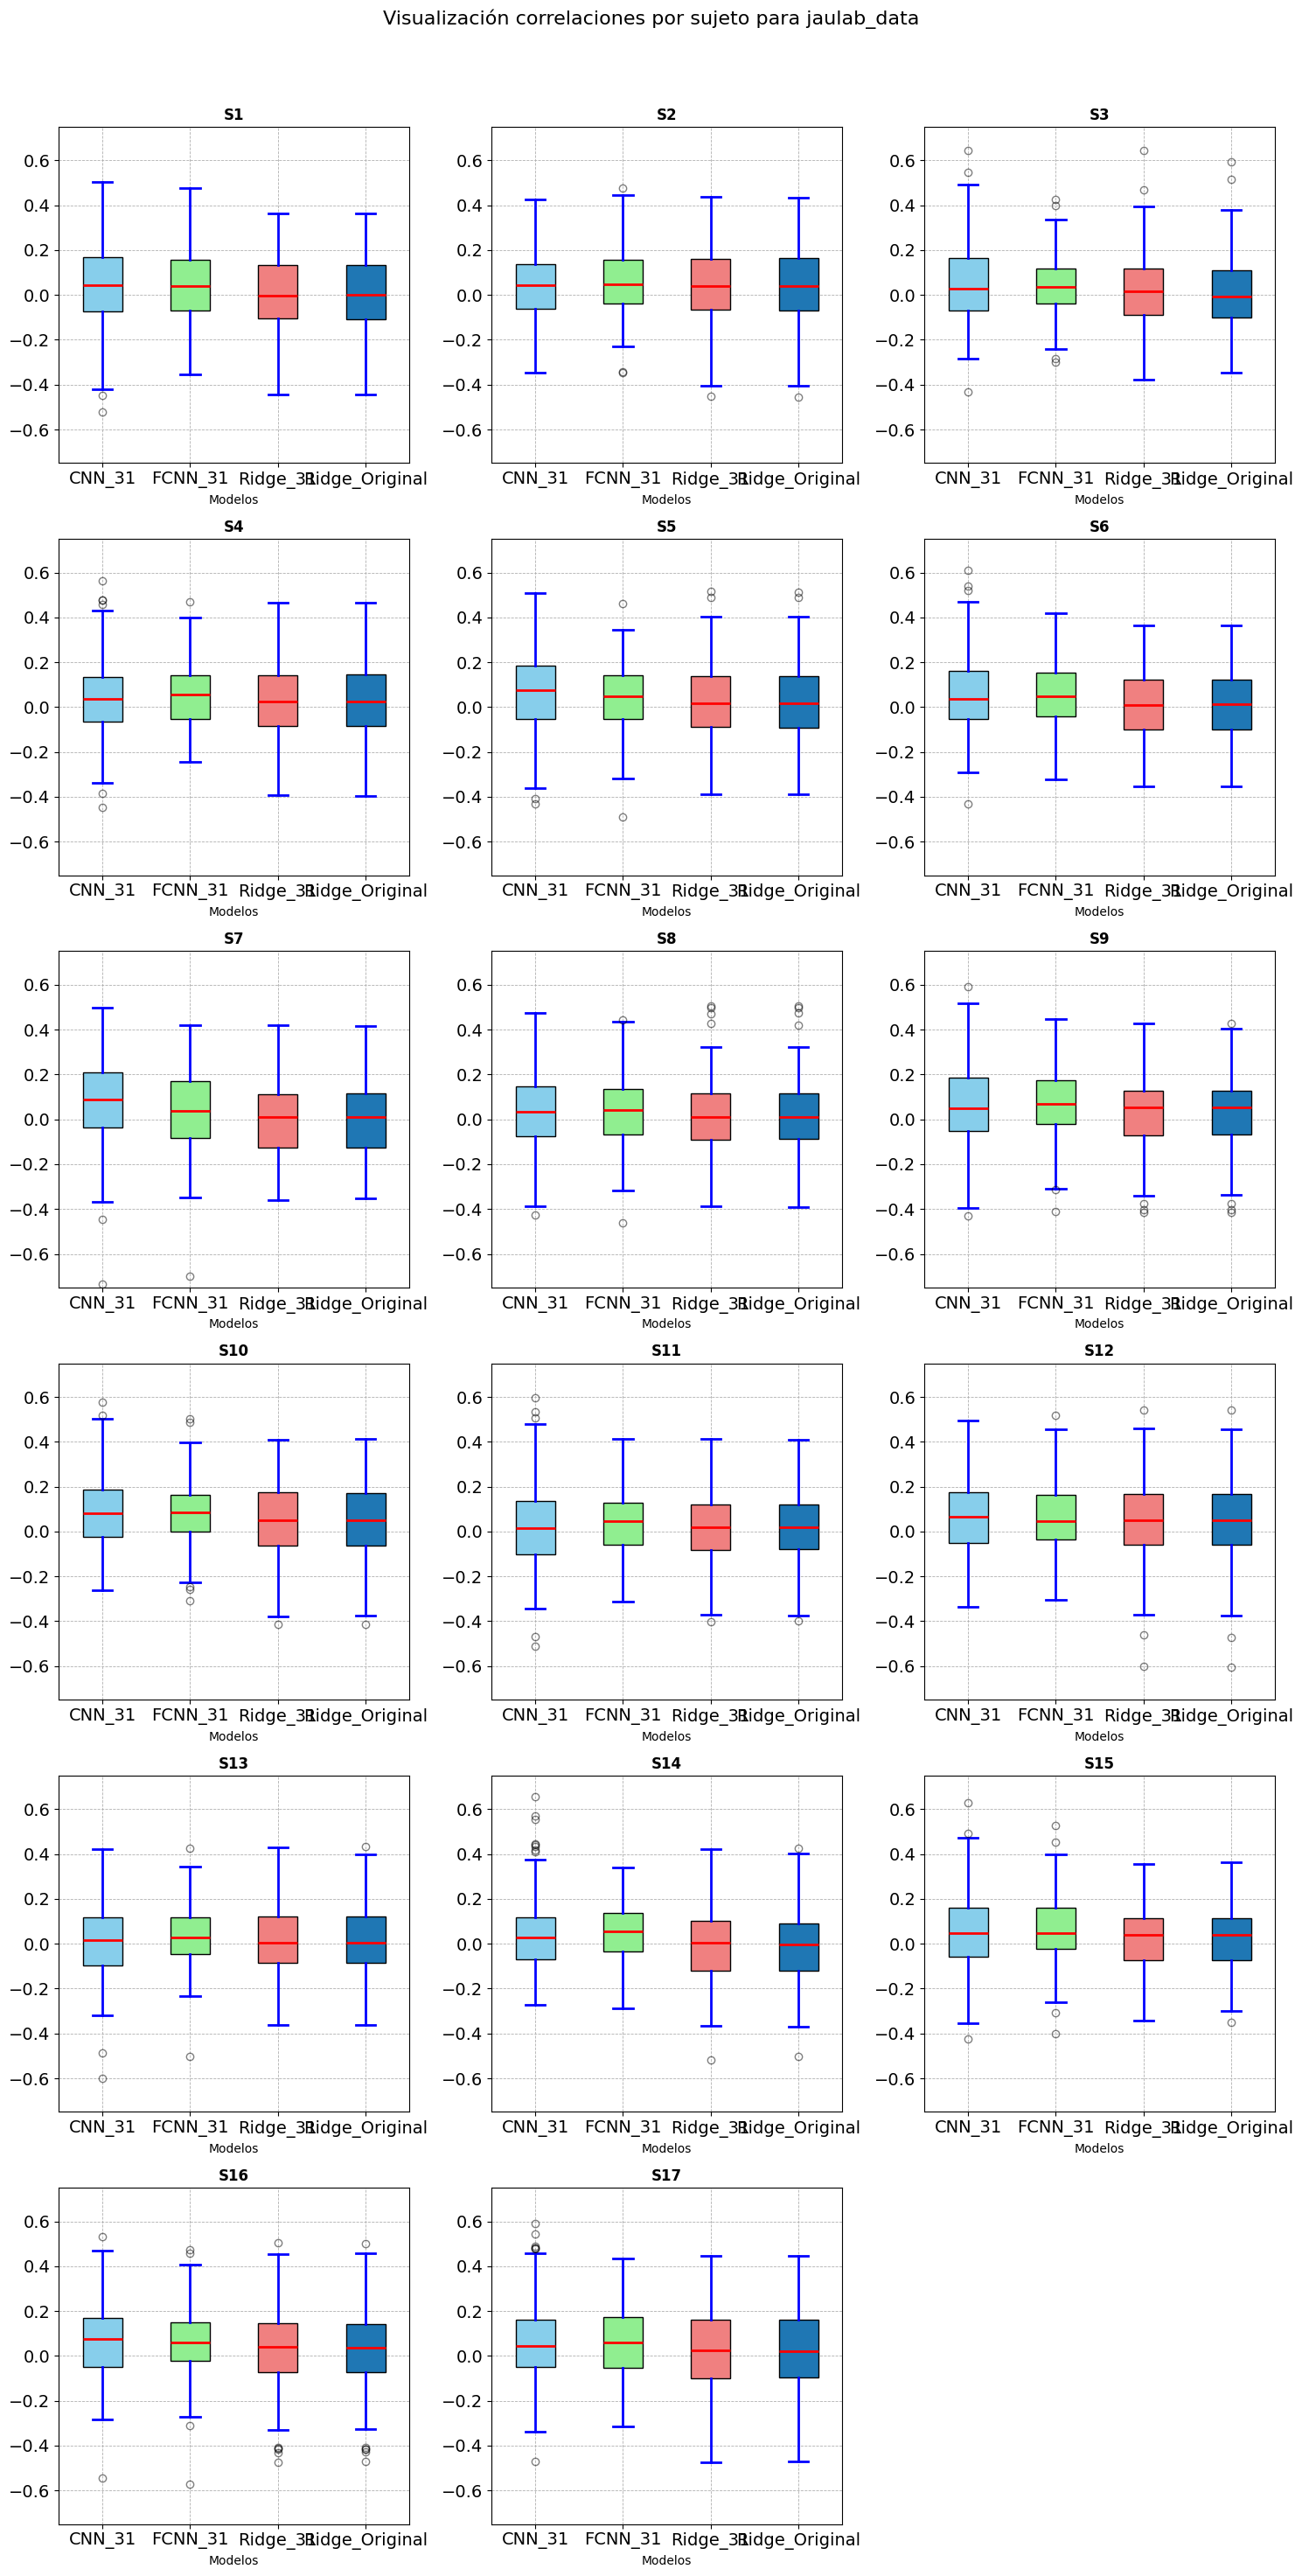

In [41]:
n_plots = len(results_subj)

# Calcular el número de filas necesarias
n_rows = (n_plots + 2) // 3

# Creo la figura y una matriz de subfiguras
fig, axs = plt.subplots(nrows=n_rows, ncols=3, figsize=(15, 5 * n_rows))

# Aplanar la matriz de subfiguras para un acceso fácil
axs = axs.flatten()

for n, (subj, values) in enumerate(results_subj.items()):

    box = axs[n].boxplot([data for data in values.values()], vert=True, patch_artist=True)
    
    # Colores personalizados
    colors = ['skyblue', 'lightgreen', 'lightcoral']
    
    # Aplicar colores a cada caja
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    
    # Personalizar otros elementos del gráfico
    for whisker in box['whiskers']:
        whisker.set(color='blue', linewidth=2)
    
    for cap in box['caps']:
        cap.set(color='blue', linewidth=2)
    
    for median in box['medians']:
        median.set(color='red', linewidth=2)
    
    for flier in box['fliers']:
        flier.set(marker='o', color='red', alpha=0.5)
    
    # Añadir título y etiquetas
    axs[n].set_title(subj, fontweight='bold')
    axs[n].set_xlabel('Modelos')
    axs[n].set_xticks([n+1 for n, model in enumerate(values.keys())], [model.split('_')[0] + '_' + model.split('_')[1] for model in values.keys()])  # Etiquetas personalizadas
    axs[n].set_ylim([-0.75, 0.75])
    
    # Añadir rejilla para mayor legibilidad
    axs[n].grid(True, linestyle='--', linewidth=0.6)
    
    # Personalizar ejes
    axs[n].tick_params(axis='both', which='major', labelsize=14)

# Eliminar subfiguras vacías si hay menos subfiguras que lugares en la cuadrícula
for ax in axs[n+1:]:
    fig.delaxes(ax)

plt.tight_layout()
# Agregar un título general a la figura
fig.suptitle('Visualización correlaciones por sujeto para '+ dataset, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar el layout para dejar espacio para el título

plt.show()

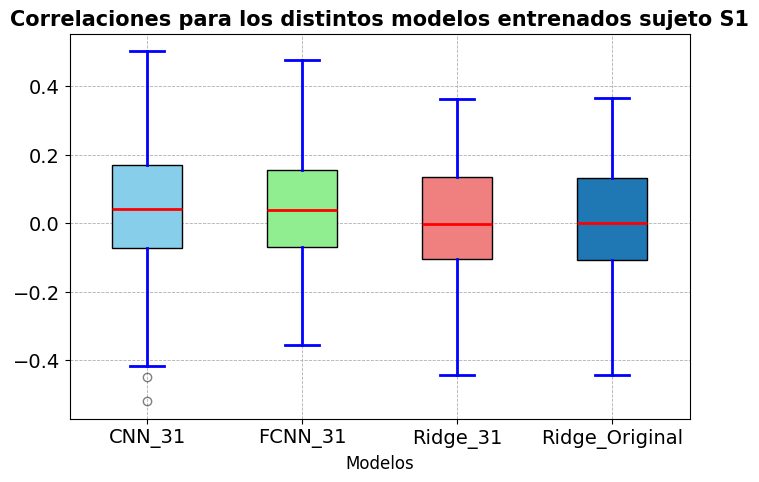

In [42]:
# EJEMPLO POR SUJETO
subj = subjects[0]
mdl_results = results_subj[subj]

plt.figure(figsize=(8, 5))  # Tamaño de la figura

# Crear el gráfico de cajas
box = plt.boxplot([value for value in mdl_results.values()], vert=True, patch_artist=True)

# Colores personalizados
colors = ['skyblue', 'lightgreen', 'lightcoral']

# Aplicar colores a cada caja
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Personalizar otros elementos del gráfico
for whisker in box['whiskers']:
    whisker.set(color='blue', linewidth=2)

for cap in box['caps']:
    cap.set(color='blue', linewidth=2)

for median in box['medians']:
    median.set(color='red', linewidth=2)

for flier in box['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)

# Añadir título y etiquetas
plt.title('Correlaciones para los distintos modelos entrenados sujeto '+subj, fontsize=15, fontweight='bold')
plt.xlabel('Modelos', fontsize=12)
plt.xticks([n+1 for n, m in enumerate(mdl_results.keys())], [model.split('_')[0] + '_' + model.split('_')[1] for model in mdl_results.keys()], fontsize=14)  # Etiquetas personalizadas

# Añadir rejilla para mayor legibilidad
plt.grid(True, linestyle='--', linewidth=0.6)

# Personalizar ejes
plt.tick_params(axis='both', which='major', labelsize=14)

# Mostrar el gráfico
plt.show()

### PREDS VS NULL DISTR

In [2]:
eval_nd_path = 'Results/eval_metrics_nd'

file_list = os.listdir(eval_nd_path)
datasets = file_list
datasets

['fulsang_data', 'hugo_data', 'jaulab_data']

In [3]:
# SELECCIONO EL DATASET
dataset = datasets[0]
path = os.path.join(eval_nd_path, dataset)
nd_file_list = os.listdir(path)
nd_file_list

['CNN_31_07_null_distr_Results',
 'FCNN_31_07_null_distr_Results',
 'Ridge_31_07_Results',
 'Ridge_Original_31_07_Results']

In [4]:
eval_path = 'Results/eval_metrics'

file_list = os.listdir(eval_path)
datasets = file_list
datasets

['fulsang_data', 'hugo_data', 'jaulab_data']

In [5]:
# SELECCIONO EL DATASET
dataset = datasets[0]
path = os.path.join(eval_path, dataset)
file_list = os.listdir(path)
file_list

['CNN_19_07_Results',
 'CNN_30_07_Results',
 'CNN_31_07_Results',
 'FCNN_19_07_Results',
 'FCNN_30_07_Results',
 'FCNN_31_07_Results',
 'Ridge_19_07_Results',
 'Ridge_30_07_Results',
 'Ridge_31_07_Results',
 'Ridge_Original_19_07_Results',
 'Ridge_Original_30_07_Results',
 'Ridge_Original_31_07_Results']

In [6]:
results = {}

# Load nd data from the folder of results
for file in nd_file_list:
    print(file)
    str_chunks = file.split('_')
    if str_chunks[1].isdigit():
        model = str_chunks[0]
        date = str_chunks[1] + '_' + str_chunks[2]
    # case ridge_original
    else:
        model = str_chunks[0] + '_' + str_chunks[1]
        date = str_chunks[2] + '_' + str_chunks[3]

    key = model + '_' + date

    if key not in results:
        results[key] = {}

    eval_results = json.load(open(os.path.join(eval_nd_path,dataset,file),'r'))
    eval_cat = torch.cat([torch.tensor(results) for results in list(eval_results.values())])
    results[key]['nd'] = eval_cat
    
    if key+'_Results' in file_list:
        eval_results = json.load(open(os.path.join(eval_path,dataset,key+'_Results'),'r'))
        eval_cat = torch.cat([torch.tensor(results) for results in list(eval_results.values())])
        results[key]['eval'] = eval_cat

len(results)

CNN_31_07_null_distr_Results
FCNN_31_07_null_distr_Results
Ridge_31_07_Results
Ridge_Original_31_07_Results


4

torch.Size([4050])
torch.Size([4050])
torch.Size([4050])
torch.Size([4050])


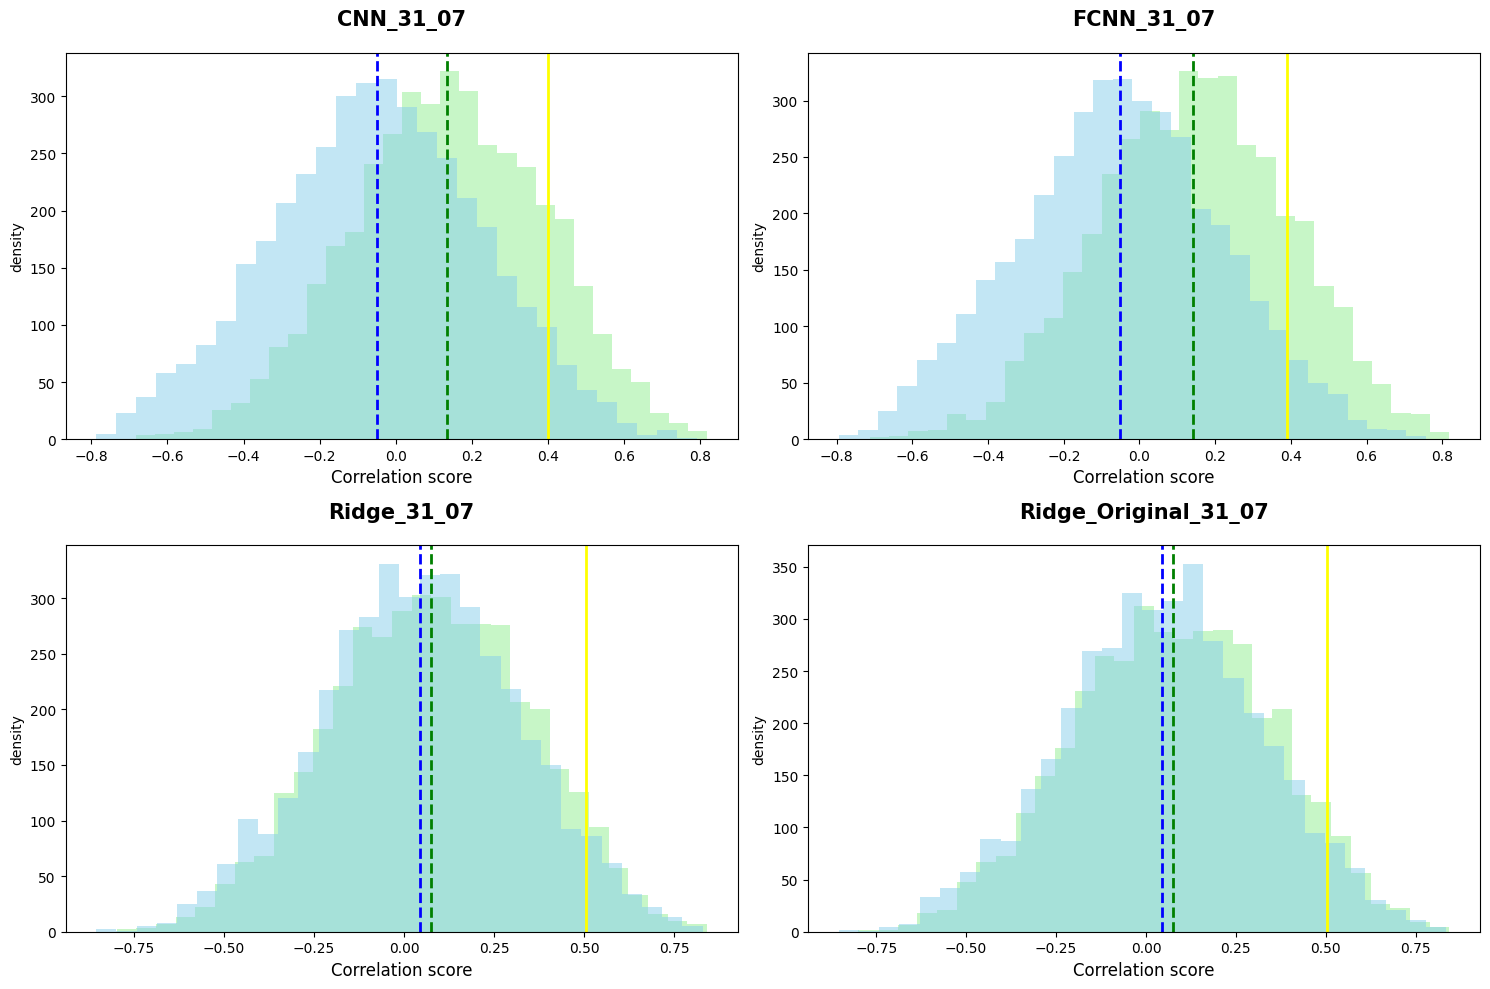

In [7]:
n_plots = len(results)

# Calcular el número de filas necesarias
n_rows = (n_plots + 1) // 2

fig, axs = plt.subplots(nrows=n_rows, ncols = 2, figsize = (15, 5*n_rows))

# aplanamiento para acceso facil, no por columnas o por filas
axs = axs.flatten()

for n, (key, value) in enumerate(results.items()):

    eval_results, nd_results = results[key]['eval'], results[key]['nd']
    percentile = np.percentile(nd_results, 95)
    print(eval_results.shape)
    
    mean_eval = torch.mean(eval_results)
    mean_nd = torch.mean(nd_results)
    
    axs[n].hist(eval_results, bins = 30, alpha= 0.5, color='lightgreen', label='eval_results')
    axs[n].hist(nd_results, bins = 30, alpha= 0.5, color='skyblue', label='nd_results')
    axs[n].axvline(mean_eval, color='green', linestyle='dashed', linewidth = 2, label='mean')
    axs[n].axvline(mean_nd, color='blue', linestyle='dashed', linewidth = 2, label='mean')
    axs[n].axvline(percentile, color='yellow', linestyle='-', linewidth = 2, label='percentile')

    # Añadir título y etiquetas
    axs[n].set_title(key, fontsize=15, fontweight='bold', pad=20)
    axs[n].set_xlabel('Correlation score', fontsize=12)
    axs[n].set_ylabel('density')

plt.tight_layout()
    

### DECODING ACCURACIES

In [9]:
# Cargo los diccionarios:
def get_times(dataset, model, date):
    path = os.path.join('Results/decode_accuracy/', dataset+'_data' , model)
    file_list = os.listdir(path)
    # times is a dict with { 'WL_date' : [list with accuracies for each subject] }
    times = {str(int(int(file.split('_')[2]) / 64)) + '_' + file.split('_')[0] + '_' + file.split('_')[1] : json.load(open(os.path.join(path, file),'r')) for file in file_list}
    ordered_keys = dict(sorted(times.items(), key=lambda item: int(item[0].split('_')[0])))
    times_ordered = {key: times[key] for key in ordered_keys if '_'.join(key.split('_')[1:]) == date}
    return times_ordered

print(get_times('fulsang', 'CNN', '31_07').keys())

dict_keys(['2_31_07', '10_31_07', '25_31_07', '50_31_07'])


In [11]:
dataset = 'fulsang'
models = ['Ridge_original', 'Ridge', 'FCNN', 'CNN']
model_info = {model: get_times(dataset, model, '31_07') for model in models}

In [12]:
# diccionario agrupando por índices de tiempo y modelos
time_keys = model_info[models[0]].keys()
print(time_keys)
times_info = {time: {model: model_info[model][time] for model in models} for time in time_keys}
print(times_info.keys())

dict_keys(['2_31_07', '10_31_07', '25_31_07', '50_31_07'])
dict_keys(['2_31_07', '10_31_07', '25_31_07', '50_31_07'])


2_31_07
Ridge: 55.97530864197531
CNN: 61.901234567901234
FCNN: 62.22222222222222
10_31_07
Ridge: 64.81481481481482
CNN: 71.85185185185186
FCNN: 75.80246913580247
25_31_07
Ridge: 71.2962962962963
CNN: 79.62962962962963
FCNN: 87.96296296296296
50_31_07
Ridge: 81.4814814814815
CNN: 88.88888888888889
FCNN: 91.9753086419753


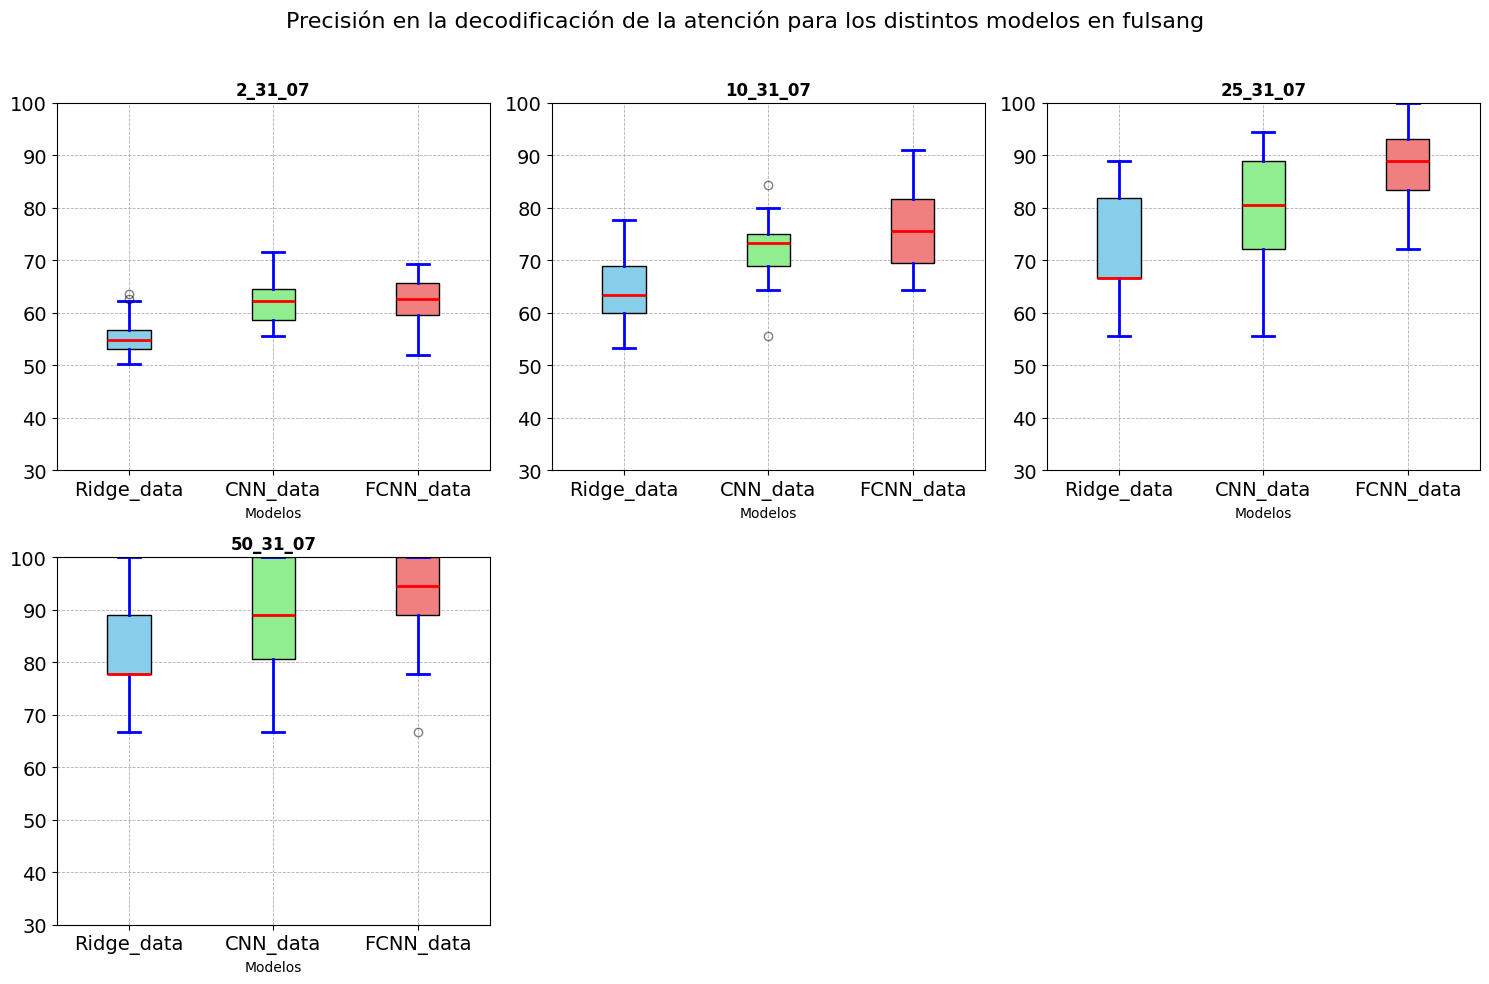

In [13]:
n_plots = len(times_info.keys())

# Calcular el número de filas necesarias
n_rows = (n_plots + 2) // 3

# Creo la figura y una matriz de subfiguras
fig, axs = plt.subplots(nrows=n_rows, ncols=3, figsize=(15, 5 * n_rows))

# Aplanar la matriz de subfiguras para un acceso fácil
axs = axs.flatten()

for n, (idx, mdl_info) in enumerate(times_info.items()):

    models = ['Ridge', 'CNN', 'FCNN']
    ventanas_media = ['2', '10', '25', '50']

    if idx.split('_')[0] in ventanas_media:
        print(idx)
        for model in models:
            print(f'{model}: {np.mean(mdl_info[model])}')

    box = axs[n].boxplot([mdl_info[model] for model in models], vert=True, patch_artist=True)
    
    # Colores personalizados
    colors = ['skyblue', 'lightgreen', 'lightcoral']
    
    # Aplicar colores a cada caja
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    
    # Personalizar otros elementos del gráfico
    for whisker in box['whiskers']:
        whisker.set(color='blue', linewidth=2)
    
    for cap in box['caps']:
        cap.set(color='blue', linewidth=2)
    
    for median in box['medians']:
        median.set(color='red', linewidth=2)
    
    for flier in box['fliers']:
        flier.set(marker='o', color='red', alpha=0.5)
    
    # Añadir título y etiquetas
    axs[n].set_title(idx, fontweight='bold')
    axs[n].set_xlabel('Modelos')
    axs[n].set_xticks([1, 2, 3], ['Ridge_data', 'CNN_data', 'FCNN_data'])  # Etiquetas personalizadas
    axs[n].set_ylim([30,100])
    
    # Añadir rejilla para mayor legibilidad
    axs[n].grid(True, linestyle='--', linewidth=0.6)
    
    # Personalizar ejes
    axs[n].tick_params(axis='both', which='major', labelsize=14)

# Eliminar subfiguras vacías si hay menos subfiguras que lugares en la cuadrícula
for ax in axs[n+1:]:
    fig.delaxes(ax)

plt.tight_layout()
# Agregar un título general a la figura
fig.suptitle('Precisión en la decodificación de la atención para los distintos modelos en '+dataset, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar el layout para dejar espacio para el título

plt.show()

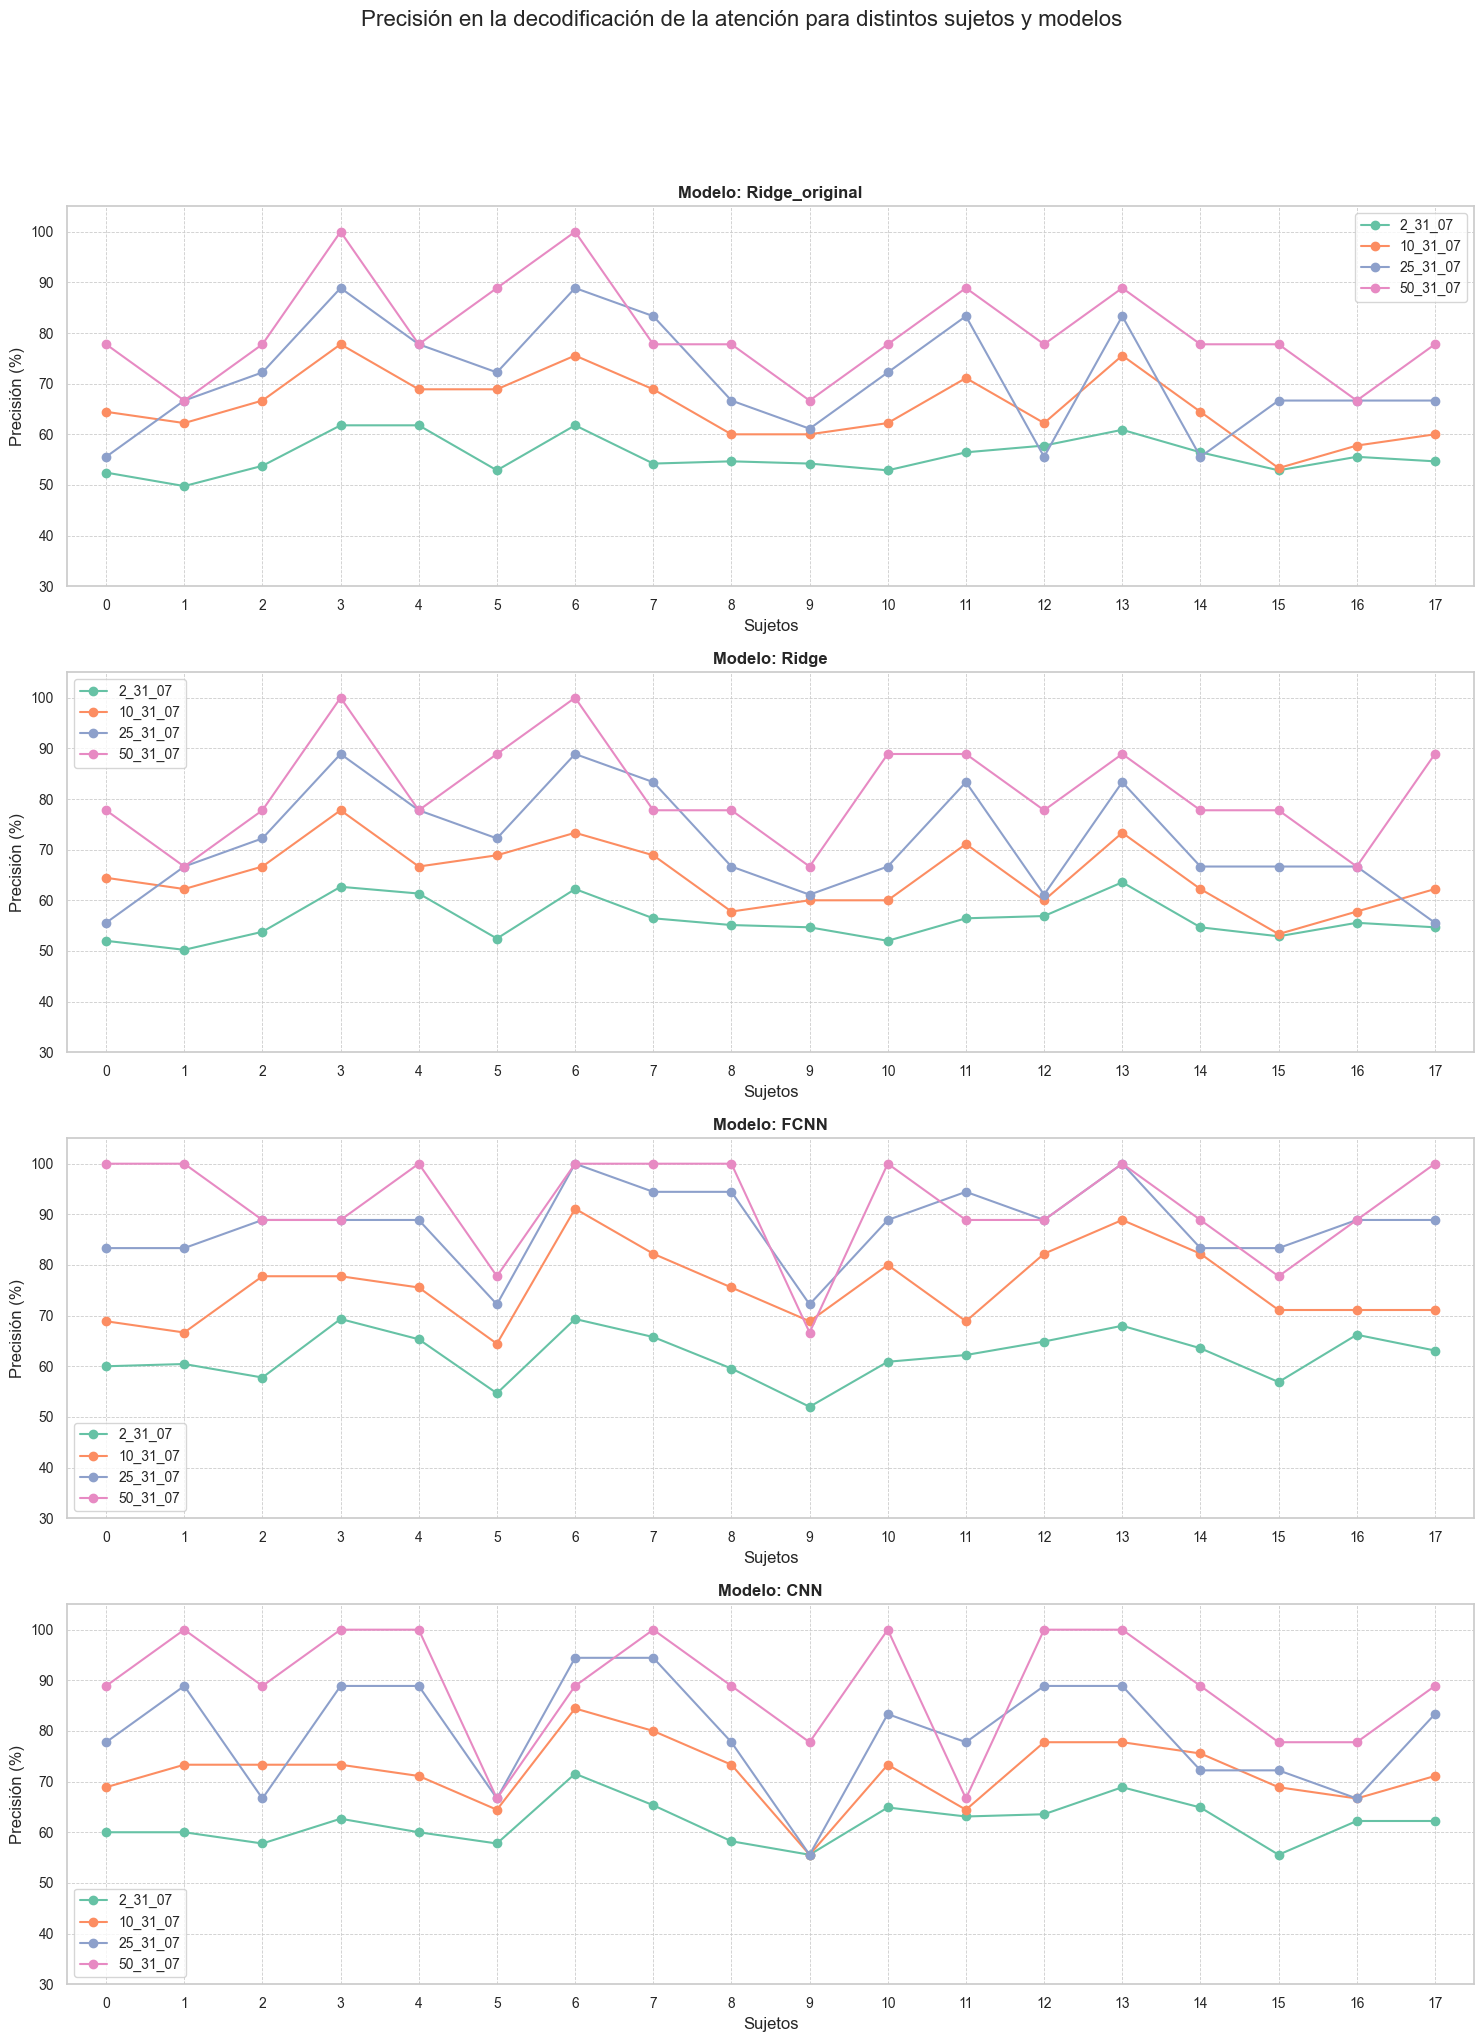

In [14]:
# Establecer estilo de seaborn
sns.set(style="whitegrid")

# Crear la figura y una matriz de subfiguras
fig, axs = plt.subplots(nrows=len(model_info), ncols=1, figsize=(15, 5 * len(model_info)))

# Aplanar la matriz de subfiguras para un acceso fácil
if len(model_info) == 1:
    axs = [axs]  # Convertir en lista si es un solo subplot
else:
    axs = axs.flatten()

# Paleta de colores de seaborn
colors = sns.color_palette("Set2", len(time_keys))  # Tres colores diferentes

# Crear las subfiguras
for n, (idx, tms_info) in enumerate(model_info.items()):
    
    x = range(len(tms_info[list(time_keys)[0]]))

    for i, time in enumerate(list(time_keys)):
        axs[n].plot(x, tms_info[time], linestyle='-', marker='o', color=colors[i], label=time)
    
    # Añadir título y etiquetas
    axs[n].set_title(f'Modelo: {idx}', fontweight='bold')
    axs[n].set_xlabel('Sujetos', fontsize=12)
    axs[n].set_ylabel('Precisión (%)', fontsize=12)
    axs[n].set_ylim([30, 105])
    axs[n].set_xlim([-0.5, 17.5])
    
    # Añadir rejilla para mayor legibilidad
    axs[n].grid(True, linestyle='--', linewidth=0.6)
    
    # Personalizar ejes
    axs[n].tick_params(axis='both', which='major', labelsize=10)
    
    # Configurar el eje x para mostrar números enteros
    axs[n].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

    # Configurar el eje x para mostrar números enteros y todos los índices
    axs[n].set_xticks(x)
    axs[n].set_xticklabels(x)
    
    # Añadir leyenda
    axs[n].legend(loc='best', fontsize=10)

# Eliminar subfiguras vacías si hay menos subfiguras que lugares en la cuadrícula
if len(model_info) < len(axs):
    for ax in axs[len(model_info):]:
        fig.delaxes(ax)

# Ajustar el layout
plt.tight_layout()
# Agregar un título general a la figura
fig.suptitle('Precisión en la decodificación de la atención para distintos sujetos y modelos', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar el layout para dejar espacio para el título

# Mostrar la gráfica
plt.show()